In [1]:
# 필요 라이브러리 로드
from matplotlib import font_manager, rc
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import sqlite3,os
import pandas as pd
import platform
from prophet import Prophet
from sklearn.model_selection import train_test_split
import openpyxl
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error
if platform.system() == 'Windows':
# 윈도우인 경우 맑은 고딕 폰트 이용
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf"
                                           ).get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')

#그래프에서 마이너스 기호가 표시되게 하는 설정입니다.
plt.rcParams['axes.unicode_minus'] == False

False

In [2]:
df_power = pd.read_csv('../data/용도별_전력사용량_20230331111046.csv', encoding= 'cp949')
df_power.fillna(value = 0)

,월별(1),용도별(1),용도별(2),항목,2013,2014,2015,2016,2017,2018,2019,2020
0,합계,합계,소계,전력사용량 (MWh),45466410,47294961,47286062,48453931,50180202,52012705,52644854,50422731
1,합계,가정용,소계,전력사용량 (MWh),2448504,2423744,2509792,2629227,2691822,2897959,2887132,3038548
2,합계,공공용,소계,전력사용량 (MWh),1026522,992261,1007144,1065147,1089612,1135633,1121458,1061722
3,합계,서비스업,소계,전력사용량 (MWh),6399018,6258873,6753172,7167563,7164438,7388134,7375368,7423314
4,합계,산업용,소계,전력사용량 (MWh),35592367,37620083,37015954,37591995,39234330,40590981,41260896,38899147
5,합계,산업용,농림수산업,전력사용량 (MWh),1602374,1628947,1767004,1875034,1928065,2112522,2136303,2043578
6,합계,산업용,광업,전력사용량 (MWh),255449,274278,280838,292889,248312,168165,172239,198914
7,합계,산업용,제조업,전력사용량 (MWh),33734544,35716859,34968112,35424072,37057953,38310294,38952353,36656655


In [3]:
df_power.drop(columns='용도별(2)', inplace=True)

In [4]:
df_power.drop(columns='월별(1)', inplace=True)

In [5]:
df_power.drop(columns='항목', inplace=True)

In [6]:
df_power.T.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9 entries, 용도별(1) to 2020
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       9 non-null      object
 1   1       9 non-null      object
 2   2       9 non-null      object
 3   3       9 non-null      object
 4   4       9 non-null      object
 5   5       9 non-null      object
 6   6       9 non-null      object
 7   7       9 non-null      object
dtypes: object(8)
memory usage: 648.0+ bytes


In [7]:
df_power.T[0]

용도별(1)          합계
2013      45466410
2014      47294961
2015      47286062
2016      48453931
2017      50180202
2018      52012705
2019      52644854
2020      50422731
Name: 0, dtype: object

In [9]:
df_power

,용도별(1),2013,2014,2015,2016,2017,2018,2019,2020
0,합계,45466410,47294961,47286062,48453931,50180202,52012705,52644854,50422731
1,가정용,2448504,2423744,2509792,2629227,2691822,2897959,2887132,3038548
2,공공용,1026522,992261,1007144,1065147,1089612,1135633,1121458,1061722
3,서비스업,6399018,6258873,6753172,7167563,7164438,7388134,7375368,7423314
4,산업용,35592367,37620083,37015954,37591995,39234330,40590981,41260896,38899147
5,산업용,1602374,1628947,1767004,1875034,1928065,2112522,2136303,2043578
6,산업용,255449,274278,280838,292889,248312,168165,172239,198914
7,산업용,33734544,35716859,34968112,35424072,37057953,38310294,38952353,36656655


In [10]:
dt2 = df_power

In [ ]:
2448504
71184734

In [11]:
dt2 = dt2.set_index('용도별(1)')

In [12]:
dt2.iloc[4] = dt2.iloc[4]+ dt2.iloc[5]+ dt2.iloc[6]+ dt2.iloc[7]

In [13]:
dt2.iloc[4]

2013    71184734
2014    75240167
2015    74031908
2016    75183990
2017    78468660
2018    81181962
2019    82521791
2020    77798294
Name: 산업용, dtype: int64

In [ ]:
dt2 = dt2.iloc[1:5]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


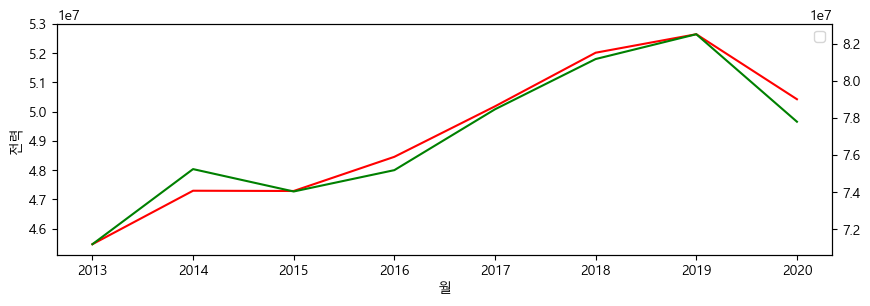

In [45]:
# 하나의 ax 만을 가지는 하나의 figure 생성
fig, ax1 = plt.subplots(figsize=(10,3))
# ax1과 x축을 공유하는 새로운 Axes 객체 생성
ax2 = ax1.twinx()

# blackout_sum의 year 컬럼 중 고유값을 for문을 통해 반복해서 출력

ax1.plot(dt2.iloc[0], color ='r')
plt.legend('가정용')
ax1.set_xlabel('월')
ax1.set_ylabel('전력')
# ax1.set_ylim([10000000, 100000000])

ax2.plot(dt2.iloc[4], color ='g')
# ax2.set_ylim([10000000, 100000000])
ax2.legend()

# 범례
# plt.legend(bbox_to_anchor=(1, 0.6))

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


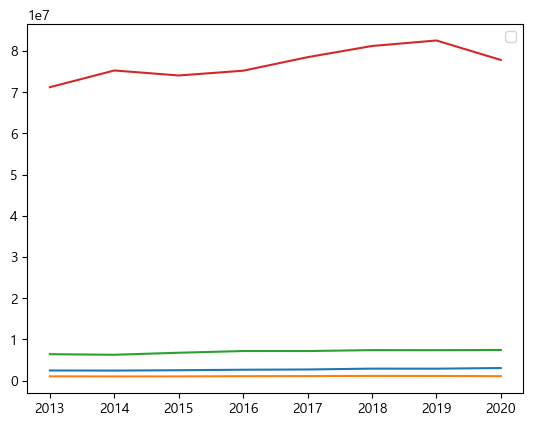

In [ ]:
for i in range(0,3):
    plt.plot(dt2.iloc[i])
    plt.legend()

plt.plot(dt2.iloc[4])
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


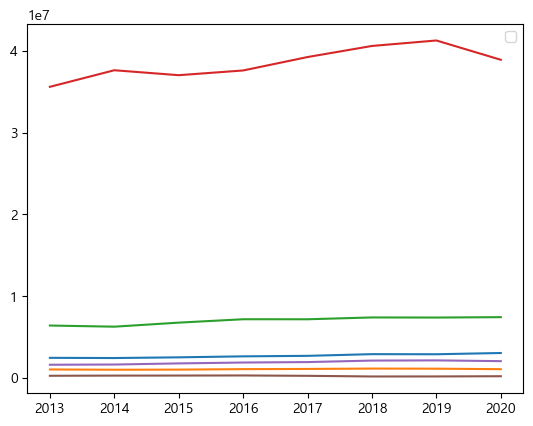

In [ ]:
plt.plot(dt2.iloc[1])
plt.plot(dt2.iloc[2])
plt.plot(dt2.iloc[3])
plt.plot(dt2.iloc[4])
plt.plot(dt2.iloc[5])
plt.plot(dt2.iloc[6])
plt.legend()
plt.show()